In [795]:
#imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score


In [796]:
data = pd.read_csv('./data.csv')
data.head()

,User_ID,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage
0,USER-00001,23,Female,6.57,6.00,0.68,12.36,Good,Low,8.01,6.71,No,Negative,Yes
1,USER-00002,21,Male,3.01,2.57,3.74,7.61,Poor,High,7.28,5.88,Yes,Positive,No
2,USER-00003,51,Male,3.04,6.14,1.26,3.16,Fair,High,8.04,9.81,No,Negative,No
3,USER-00004,25,Female,3.84,4.48,2.59,13.08,Excellent,Medium,5.62,5.28,Yes,Negative,Yes
4,USER-00005,53,Male,1.20,0.56,0.29,12.63,Good,Low,5.55,4.00,No,Positive,Yes


In [797]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User_ID                   10000 non-null  object 
 1   Age                       10000 non-null  int64  
 2   Gender                    10000 non-null  object 
 3   Technology_Usage_Hours    10000 non-null  float64
 4   Social_Media_Usage_Hours  10000 non-null  float64
 5   Gaming_Hours              10000 non-null  float64
 6   Screen_Time_Hours         10000 non-null  float64
 7   Mental_Health_Status      10000 non-null  object 
 8   Stress_Level              10000 non-null  object 
 9   Sleep_Hours               10000 non-null  float64
 10  Physical_Activity_Hours   10000 non-null  float64
 11  Support_Systems_Access    10000 non-null  object 
 12  Work_Environment_Impact   10000 non-null  object 
 13  Online_Support_Usage      10000 non-null  object 
dtypes: floa

,Age,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Sleep_Hours,Physical_Activity_Hours
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,41.518600,6.474341,3.972321,2.515598,7.975765,6.500724,5.003860
std,13.920217,3.169022,2.313707,1.446748,4.042608,1.450933,2.905044
min,18.000000,1.000000,0.000000,0.000000,1.000000,4.000000,0.000000
25%,29.000000,3.760000,1.980000,1.260000,4.520000,5.260000,2.490000
50%,42.000000,6.425000,3.950000,2.520000,7.900000,6.500000,4.990000
75%,54.000000,9.212500,5.990000,3.790000,11.500000,7.760000,7.540000
max,65.000000,12.000000,8.000000,5.000000,15.000000,9.000000,10.000000


In [798]:
print(data.isnull().sum())

User_ID                     0
Age                         0
Gender                      0
Technology_Usage_Hours      0
Social_Media_Usage_Hours    0
Gaming_Hours                0
Screen_Time_Hours           0
Mental_Health_Status        0
Stress_Level                0
Sleep_Hours                 0
Physical_Activity_Hours     0
Support_Systems_Access      0
Work_Environment_Impact     0
Online_Support_Usage        0
dtype: int64


In [799]:
data.shape

(10000, 14)

In [800]:
# Распределение целевой переменной
print(data['Mental_Health_Status'].value_counts())

Mental_Health_Status
Excellent    2518
Good         2508
Fair         2490
Poor         2484
Name: count, dtype: int64


In [801]:
data = data.drop('User_ID', axis=1)

In [802]:
data['Mental_Health_Status'] = data['Mental_Health_Status'].apply(lambda x: 1 if x in 'Excellent' else 0)

data

,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage
0,23,Female,6.57,6.00,0.68,12.36,0,Low,8.01,6.71,No,Negative,Yes
1,21,Male,3.01,2.57,3.74,7.61,0,High,7.28,5.88,Yes,Positive,No
2,51,Male,3.04,6.14,1.26,3.16,0,High,8.04,9.81,No,Negative,No
3,25,Female,3.84,4.48,2.59,13.08,1,Medium,5.62,5.28,Yes,Negative,Yes
4,53,Male,1.20,0.56,0.29,12.63,0,Low,5.55,4.00,No,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,42,Male,7.05,0.41,0.53,13.90,0,Medium,7.37,5.02,Yes,Neutral,No
9996,31,Other,3.12,6.79,0.80,1.17,0,Medium,8.92,9.78,No,Neutral,Yes
9997,23,Male,4.38,3.98,0.52,7.81,0,High,7.59,2.99,No,Positive,No
9998,38,Male,4.44,1.48,3.28,13.95,0,Medium,7.26,2.24,Yes,Neutral,Yes


In [803]:
le_gender = LabelEncoder()
le_support = LabelEncoder()
le_work_impact = LabelEncoder()
le_online_support = LabelEncoder()
le_stress_level = LabelEncoder()

# Кодируем бинарные категориальные признаки
data['Gender'] = le_gender.fit_transform(data['Gender'])  # Пример: Male -> 1, Female -> 0
data['Support_Systems_Access'] = le_support.fit_transform(data['Support_Systems_Access'])  # Yes -> 1, No -> 0
data['Work_Environment_Impact'] = le_work_impact.fit_transform(data['Work_Environment_Impact'])  # Positive -> 1, Negative -> 0
data['Online_Support_Usage'] = le_online_support.fit_transform(data['Online_Support_Usage'])  # Yes -> 1, No -> 0
data['Stress_Level'] = le_stress_level.fit_transform(data['Stress_Level'])

In [804]:
data.head()

,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage
0,23,0,6.57,6.00,0.68,12.36,0,1,8.01,6.71,0,0,1
1,21,1,3.01,2.57,3.74,7.61,0,0,7.28,5.88,1,2,0
2,51,1,3.04,6.14,1.26,3.16,0,0,8.04,9.81,0,0,0
3,25,0,3.84,4.48,2.59,13.08,1,2,5.62,5.28,1,0,1
4,53,1,1.20,0.56,0.29,12.63,0,1,5.55,4.00,0,2,1


Распределение целевой переменной:
Mental_Health_Status
0    7482
1    2518
Name: count, dtype: int64


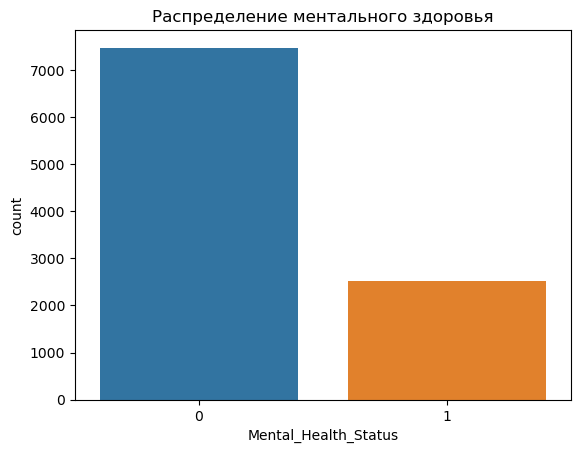

In [805]:
print("Распределение целевой переменной:")
print(data['Mental_Health_Status'].value_counts())

sns.countplot(x='Mental_Health_Status', data=data)
plt.title("Распределение ментального здоровья")
plt.show()

Корреляция с целевой переменной (Mental_Health_Status):
Mental_Health_Status        1.000000
Gaming_Hours                0.010640
Physical_Activity_Hours     0.010139
Stress_Level                0.009871
Online_Support_Usage        0.006577
Age                         0.001360
Screen_Time_Hours          -0.003838
Work_Environment_Impact    -0.004755
Technology_Usage_Hours     -0.006471
Sleep_Hours                -0.008217
Support_Systems_Access     -0.008519
Gender                     -0.009505
Social_Media_Usage_Hours   -0.010771
Name: Mental_Health_Status, dtype: float64


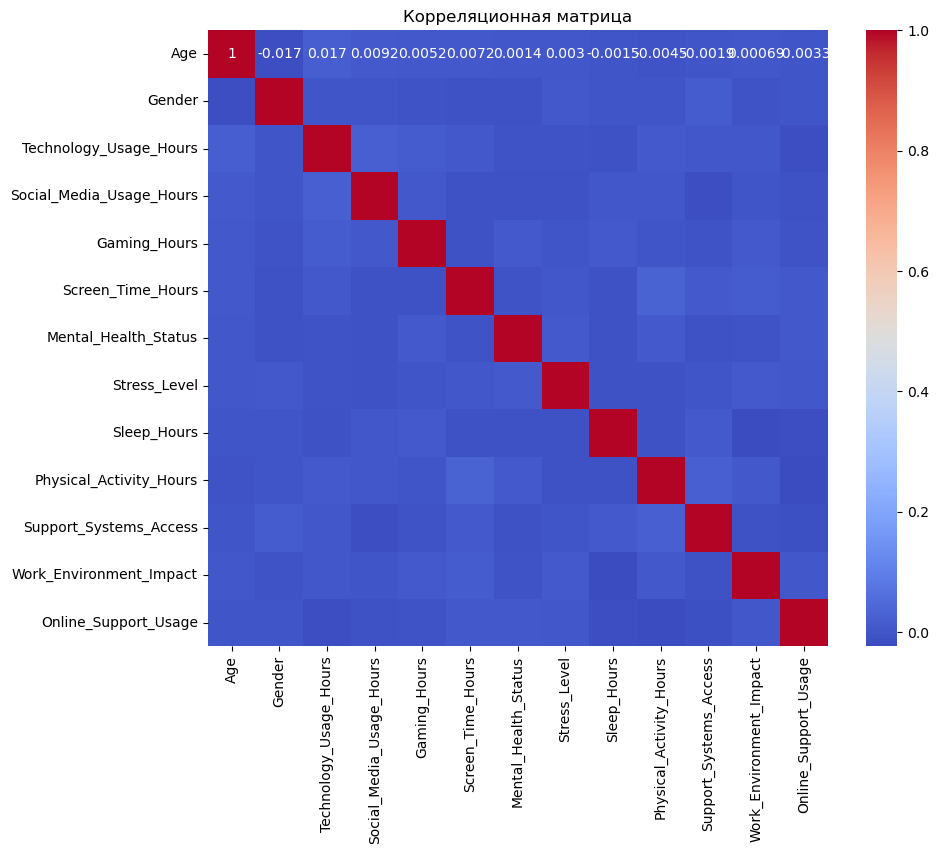

In [806]:
correlation_matrix = data.corr()
print("Корреляция с целевой переменной (Mental_Health_Status):")
print(correlation_matrix['Mental_Health_Status'].sort_values(ascending=False))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Корреляционная матрица")
plt.show()

In [807]:
X = data.drop('Mental_Health_Status', axis=1)
y = data['Mental_Health_Status'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Размеры обучающей выборки: {X_train.shape}, тестовой выборки: {X_test.shape}")

Размеры обучающей выборки: (8000, 12), тестовой выборки: (2000, 12)


In [808]:
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")

Точность модели: 0.75


Отчет по классификации:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1503
           1       0.00      0.00      0.00       497

    accuracy                           0.75      2000
   macro avg       0.38      0.50      0.43      2000
weighted avg       0.56      0.75      0.64      2000



C:\Users\Fellix\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Fellix\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Fellix\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


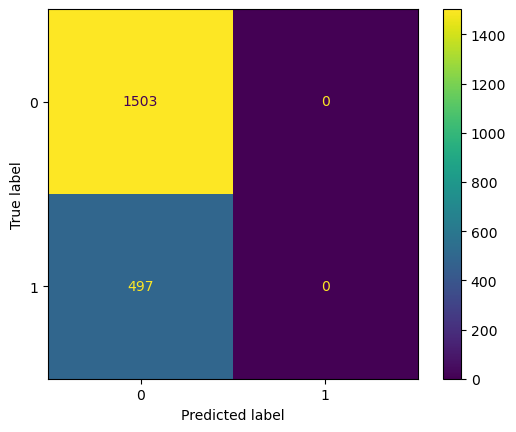

In [809]:
print("Отчет по классификации:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()

In [ ]:
param_dist = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42), 
                                   param_distributions=param_dist, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

best_rf_model = random_search.best_estimator_

y_pred_best_rf = best_rf_model.predict(X_test)

print(f"Точность оптимизированной модели: {accuracy_score(y_test, y_pred_best_rf):.2f}")
print("Отчет по классификации для оптимизированной модели:")
print(classification_report(y_test, y_pred_best_rf))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [ ]:
print(data['Mental_Health_Status'].value_counts())

In [ ]:
print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

print("Обучающая выборка:")
print(X_train.head())
print("Тестовая выборка:")
print(X_test.head())

In [ ]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print(f"Средняя точность модели при кросс-валидации: {cv_scores.mean():.2f}")
print(f"Точность на каждом фолде: {cv_scores}")

In [ ]:
model = RandomForestClassifier(random_state=42, class_weight='balanced', max_depth=10)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели с ограниченной глубиной: {accuracy:.2f}")

In [ ]:
import pickle

# Сохраняем модель Random Forest в файл
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Модель сохранена как 'random_forest_model.pkl'")

In [ ]:
import sklearn
print(sklearn.__version__)
